In [3]:
from datascience import *
import numpy as np
path_data = '../assets/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Overlaid Graphs

In this chapter, we have learned how to visualize data by drawing graphs. A common use of such visualizations is to compare two datasets. In this section, we will see how to *overlay* plots, that is, draw them in a single graphic on a common pair of axes.

For the overlay to make sense, the graphs that are being overlaid must represent the same variables and be measured in the same units. 

To draw overlaid graphs, the methods `scatter`, `plot`, and `barh` can all be called in the same way. For `scatter` and `plot`, one column must serve as the common horizontal axis for all the overlaid graphs. For `barh`, one column must serve as the common axis which is the set of categories. The general call looks like:

`name_of_table.method(column_label_of_common_axis, array_of_labels_of_variables_to_plot)`

More commonly, we will first select only the columns needed for our graph, and then call the method by just specifying the variable on the common axis:

`name_of_table.method(column_label_of_common_axis)`


## Overlaid Scatter Plots

The table `sons_heights` is part of a historical data set on the heights of parents and their children. Specifically, the population consists of 179 men who were the first-born in their families. The data are their own heights and the heights of their parents. All heights were measured in inches.

In [4]:
sons_heights = Table.read_table(path_data + 'sons_heights.csv')
sons_heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


The `scatter` method allows us to visualize how the sons' heights are related to the heights of both their parents. In the graph, the sons' heights will form the common horizontal axis. 

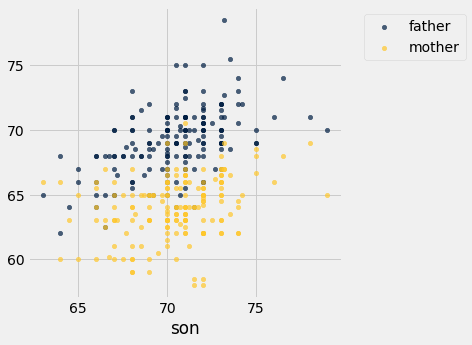

In [8]:
sons_heights.scatter('son')

Notice how we only specified the variable (sons' heights) on the common horizontal axis. Python drew two scatter plots: one each for the relation between this variable and the other two.

Each point represents a row of the table, that is, a "father, mother, son" trio. For all points, the horizontal axis represents the son's height. In the blue points, the vertical axis represents the father's height. In the gold points, the vertical axis represents the mother's heights.

Both the gold and the blue scatter plots slope upwards and show a positive association between the sons' heights and the heights of both their parents. The blue (fathers) plot is in general higher than the gold, because the fathers were in general taller than the mothers.

## Overlaid Line Plots

Our next example involves data on children of more recent times. We will return to the Census data table `us_pop`, created below again for reference. From this table, we will extract the counts of all children in each of the age categories 0 through 18 years.

In [10]:
# Read the full Census table
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = Table.read_table(data)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


In [11]:
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [16]:
children = us_pop.where("SEX", are.equal_to(0)).where("AGE", are.below(19)).drop("SEX")
children

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


We can now draw two overlaid line plots, showing the numbers of children in the different age groups for each of the years 2014 and 2019. The call is analogous to the `scatter` call in the previous example.

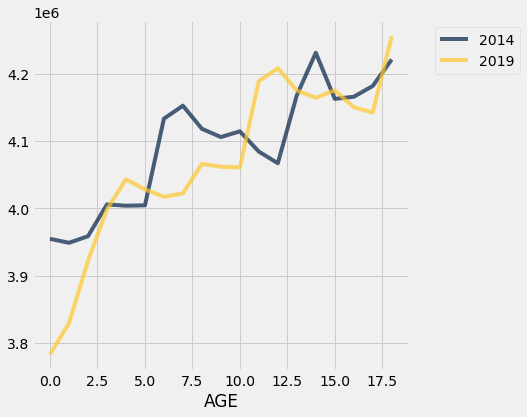

In [10]:
children.plot('AGE')

Though the horizontal axis labels include some half-integers, it's important to remember that we only have data at ages 0, 1, 2, and so on. The line plots "join the dots" in between.

The two graphs cross each other in a few places. For example, there were more 6-year-olds in 2014 than in 2019, and there were more 12-year-olds in 2019 than in 2014.

Of course, the 12-year-olds in 2019 mostly consist of the children who were 7-year-olds in 2014. To see this on the plots, compare the gold graph at `AGE` 12 and the blue graph at `AGE` 7. You will notice that the gold graph (2019) looks very much like the blue graph (2014) slid over to the right by 5 years. The slide is accompanied by a slight rise due to the net effect of children who entered the country between 2014 and 2019 outnumbering those who left. Fortunately at these ages there is not much loss of life.

## Bar Charts

The Kaiser Family Foundation has complied Census data on the distribution of race and ethnicity in the U.S. The Foundation's website provides compilations of data for [the entire U.S. population](http://kff.org/other/state-indicator/distribution-by-raceethnicity/) in 2019, as well as for [U.S. children](http://kff.org/other/state-indicator/children-by-raceethnicity/) who were younger than 18 years old that year.

The table `usa_ca` is adapted from their data for the United States and California. The columns represent everyone in the U.S.A., everyone in California, children in the U.S.A., and children in California. 

The body of the table contains percents in the different categories. Each column shows the distribution of the `Ethnicity/Race` variable in the group of people corresponding to that column. So in each column, the entries add up to 100. The `API` category consists of Asians and Pacific Islanders including Native Hawaiians. The `Other` category includes Native Americans, Alaskan natives, and people who identify with multiple races.

In [14]:
usa_ca = Table.read_table(path_data + 'usa_ca_2019.csv')
usa_ca

Ethnicity/Race,USA All,CA All,USA Children,CA Children
API,5.8,15.1,4.9,11.5
Black,12.2,5.3,13.4,4.9
Hispanic,18.5,39.5,25.6,52.1
White,60.1,36.4,50,25.5
Other,3.4,3.7,6.1,6


It is natural to want to compare these distributions. It makes sense to compare the columns directly, because all the entries are percents and are therefore on the same scale.

The method `barh` allows us to visualize the comparisons by drawing multiple bar charts on the same axes. The call is analogous to those for `scatter` and `plot`: we have to specify the common axis of categories. 

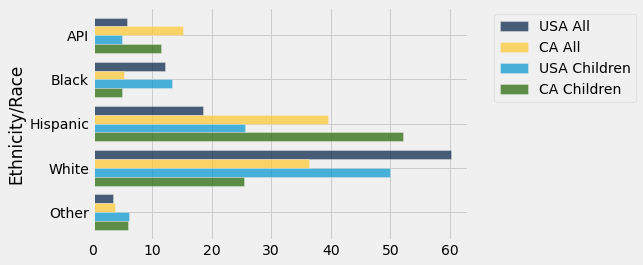

In [15]:
usa_ca.barh('Ethnicity/Race')

While drawing the overlaid bar charts is straightforward, there is a bit too much information on this graph for us to be able to sort out similarities and differences between populations. It is much easier to compare the populations one pair at a time. 

Let's start by comparing the entire populations of the U.S.A. and California. 

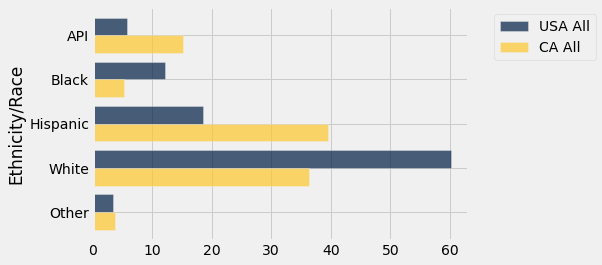

In [16]:
usa_ca.select('Ethnicity/Race', 'USA All', 'CA All').barh('Ethnicity/Race')

The two distributions are quite different. California has higher percents in the `API` and `Hispanic` categories, and correspondingly lower percents in the`Black` and `White` categories. The percents in the `Other` category are quite similar in the two populations. The differences are largely due to California's geographical location and patterns of immigration and migration, both historically and in more recent decades. 

As you can see from the graph, almost 40% of the Californian population in 2019 was `Hispanic`. A comparison with the population of children in the state indicates that the `Hispanic` proportion is likely to be greater in future years. Among Californian children in 2019, more than 50% were in the `Hispanic` category.

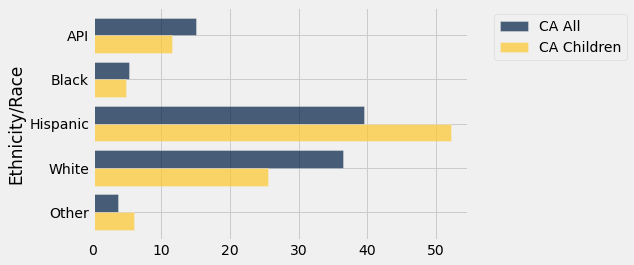

In [18]:
usa_ca.select('Ethnicity/Race', 'CA All', 'CA Children').barh('Ethnicity/Race')

More complex data sets naturally give rise to varied and interesting visualizations, including overlaid graphs of different kinds. To analyze such data, it helps to have some more skills in data manipulation, so that we can get the data into a form that allows us to use methods like those in this section. In the next chapter we will develop some of these skills.